In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
pd.read_csv('https://raw.githubusercontent.com/HeardLibrary/digital-scholarship/master/data/codegraf/mesa2880172.csv')

,STATION,NAME,DATE,CDSD,DSND,DSNW,EMNT,EMSD,EMSN,EMXP,EMXT,HDSD,PRCP,SNOW,TAVG,TMAX,TMIN
0,USC00025467,"MESA, AZ US",1896-03,NaN,0.0,0.0,1.1,0.0,0.0,9.9,35.0,NaN,11.7,0.0,16.7,24.9,8.4
1,USC00025467,"MESA, AZ US",1896-04,NaN,0.0,0.0,4.4,0.0,0.0,0.8,35.6,NaN,0.8,0.0,18.3,28.0,8.7
2,USC00025467,"MESA, AZ US",1896-06,NaN,0.0,0.0,15.6,0.0,0.0,0.0,46.7,NaN,0.0,0.0,31.2,41.9,20.5
3,USC00025467,"MESA, AZ US",1896-07,NaN,0.0,0.0,12.2,0.0,0.0,22.9,43.3,0.0,86.5,0.0,28.6,38.4,18.8
4,USC00025467,"MESA, AZ US",1896-08,NaN,0.0,0.0,16.1,0.0,0.0,2.3,43.3,0.0,6.7,0.0,29.9,37.1,22.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,USC00025467,"MESA, AZ US",2017-05,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,4.0,NaN,NaN,NaN,NaN
1417,USC00025467,"MESA, AZ US",2017-06,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1418,USC00025467,"MESA, AZ US",2017-07,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,4.3,NaN,NaN,NaN,NaN
1419,USC00025467,"MESA, AZ US",2017-08,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,38.6,NaN,NaN,NaN,NaN


In [83]:
climate_data = pd.read_csv('https://raw.githubusercontent.com/HeardLibrary/digital-scholarship/master/data/codegraf/mesa2880172.csv')
climate_data['YEAR'] = climate_data['DATE'].str.slice(0, 4)
climate_data['MONTH'] = climate_data['DATE'].str.slice(5, 6)

In [84]:
years = list(range(1896, 2017))
prcp_table = []
for year in years:
    year_row = climate_data[climate_data['YEAR'] == str(year)]
    year_mean_precipitation = year_row['PRCP'].mean()
    if not np.isnan(year_mean_precipitation):
        year_dict = {'Year': year, 'Mean Precipitation': year_mean_precipitation}
        prcp_table.append(year_dict)

prcp_table_df = pd.DataFrame(prcp_table)
prcp_table_df.head()

,Year,Mean Precipitation
0,1896,25.187500
1,1897,19.041667
2,1898,16.591667
3,1899,11.675000
4,1900,10.791667


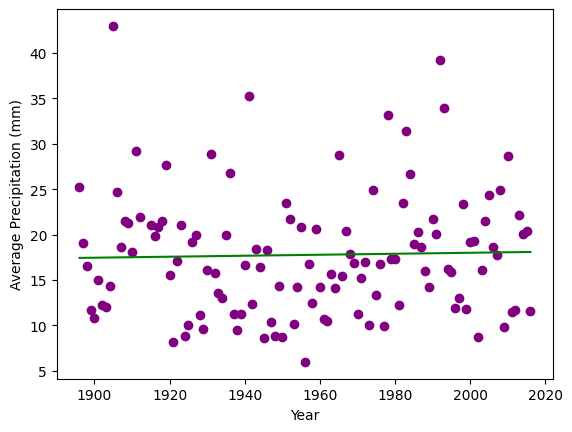

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(prcp_table_df['Year'], prcp_table_df['Mean Precipitation'], color='purple')

ax.set_xlabel('Year')
ax.set_ylabel('Average Precipitation (mm)')

#adding the treadline 
z = np.polyfit(prcp_table_df['Year'], prcp_table_df['Mean Precipitation'], 1)
p = np.poly1d(z)
ax.plot(prcp_table_df['Year'], p(prcp_table_df['Year']), color='green')

# displaying the plot
plt.show()

In [86]:
years = list(range(1896, 2017))
temp_table = []
for year in years:
    year_row = climate_data[climate_data['YEAR'] == str(year)]
    year_mean_temperature = year_row['TAVG'].mean()
    if not np.isnan(year_mean_temperature):
        year_dict = {'Year': year, 'Mean Temperature': year_mean_temperature}
        temp_table.append(year_dict)

temp_table_df = pd.DataFrame(temp_table)
temp_table_df.head()

,Year,Mean Temperature
0,1896,21.437500
1,1897,20.150000
2,1898,20.225000
3,1899,19.491667
4,1900,20.691667


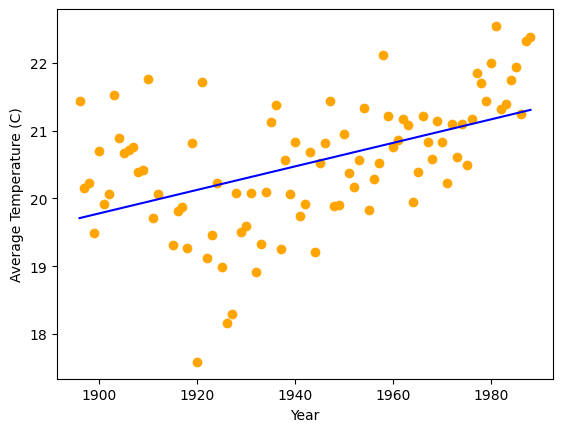

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(temp_table_df['Year'], temp_table_df['Mean Temperature'], color='orange')

ax.set_xlabel('Year')
ax.set_ylabel('Average Temperature (C)')

#adding the treadline 
z = np.polyfit(temp_table_df['Year'], temp_table_df['Mean Temperature'], 1)
p = np.poly1d(z)
ax.plot(temp_table_df['Year'], p(temp_table_df['Year']), color='blue')

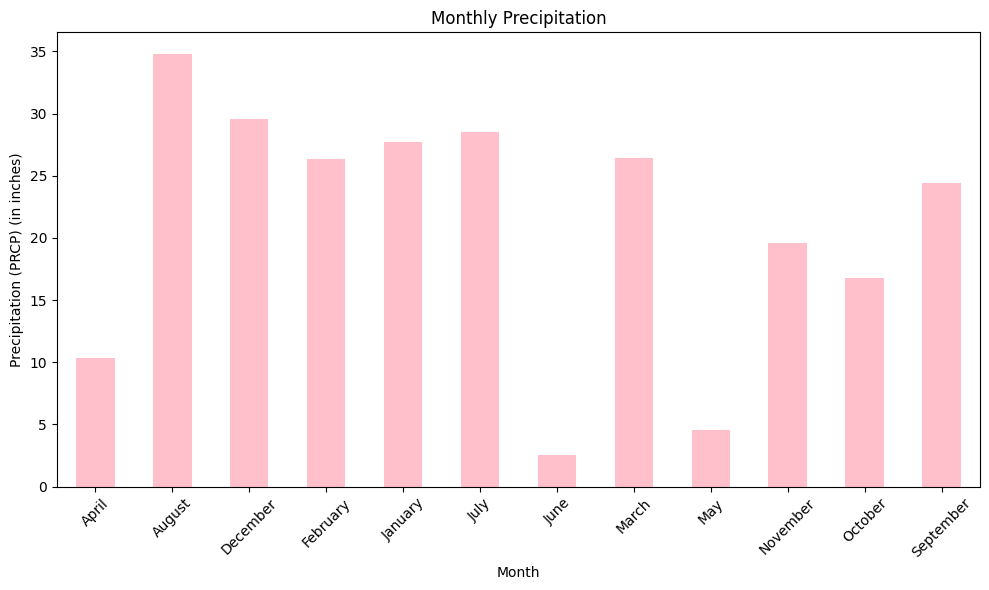

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Assuming climate_data is your DataFrame with DATE and PRCP columns
# Example dataframe creation
# climate_data = pd.DataFrame({'DATE': pd.date_range(start='2024-01-01', end='2024-12-31', freq='M'),
#                              'PRCP': [100, 150, 200, 80, 120, 180, 220, 250, 300, 280, 140, 100]})

# Convert DATE column to datetime if it's not already
climate_data['DATE'] = pd.to_datetime(climate_data['DATE'])

# Extract month names from the DATE column
climate_data['Month'] = climate_data['DATE'].dt.month_name()

# Group by month and calculate total precipitation for each month
monthly_precipitation = climate_data.groupby('Month')['PRCP'].sum()

# Divide each PRCP observation by 100 to adjust the scale
monthly_precipitation_scaled = monthly_precipitation / 100

# Plotting
plt.figure(figsize=(10, 6))
monthly_precipitation_scaled.plot(kind='bar', color='pink')
plt.title('Monthly Precipitation')
plt.xlabel('Month')
plt.ylabel('Precipitation (PRCP) (in inches)')
plt.xticks(range(len(monthly_precipitation_scaled)), monthly_precipitation_scaled.index, rotation=45)
plt.tight_layout()
plt.show()


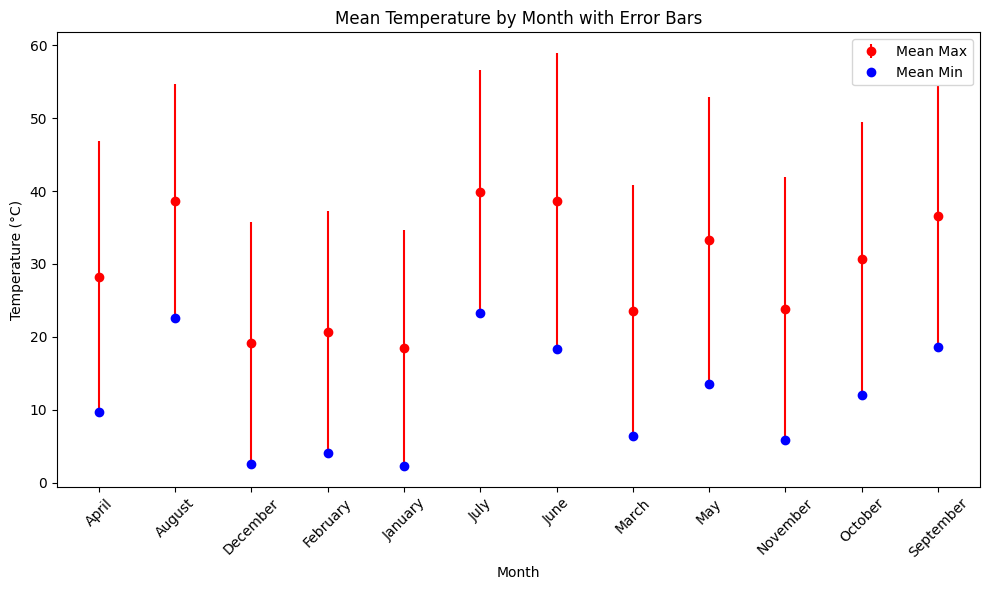

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Assuming climate_data is your DataFrame with DATE, TMAX, and TMIN columns
# Example dataframe creation
# climate_data = pd.DataFrame({'DATE': pd.date_range(start='2024-01-01', end='2024-12-31', freq='D'),
#                              'TMAX': [30, 35, 40, 25, 28, 32, 36, 38, 39, 37, 33, 30]*31,
#                              'TMIN': [20, 25, 28, 18, 20, 22, 25, 28, 30, 28, 25, 22]*31})

# Convert DATE column to datetime if it's not already
climate_data['DATE'] = pd.to_datetime(climate_data['DATE'])

# Extract month names from the DATE column
climate_data['Month'] = climate_data['DATE'].dt.month_name()

# Group by month and calculate mean temperature, mean maximum, and mean minimum for each month
monthly_mean_temperatures = climate_data.groupby('Month').agg({'TMAX': 'mean', 'TMIN': 'mean'})

# Calculate mean maximum and mean minimum for each month
mean_max = monthly_mean_temperatures['TMAX']
mean_min = monthly_mean_temperatures['TMIN']

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(monthly_mean_temperatures)), mean_max, yerr=mean_max - mean_min, fmt='o', color='red', label='Mean Max')
plt.errorbar(range(len(monthly_mean_temperatures)), mean_min, fmt='o', color='blue', label='Mean Min')
plt.title('Mean Temperature by Month with Error Bars')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(range(len(monthly_mean_temperatures)), monthly_mean_temperatures.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
